In [3]:
import pymc3 as pm

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import scipy.stats as scistats
from scipy.special import binom

In [8]:
from collections import defaultdict

In [108]:
from functools import reduce

In [131]:
import seaborn as sb

In [114]:
# this function computes the discretized lognormal probabilities for a certain range. It uses integral
# over PDF (probability density function) of normal distribution between f(x[i]) and f(x[i+1]), where
# f is the inverse of the transform between normal and lognormal. This integral is
# expressed via CDF (cumulative density function) of the normal distribution
def lognorm_probs(mu, sigma, maxn):
    xs = np.arange(maxn + 1)
    cdfs = np.zeros_like(xs, dtype = float)
    cdfs[xs > 0] = scistats.norm.cdf((np.log(xs[xs > 0]) - mu) / sigma)
    return cdfs[1:] - cdfs[:-1]

In [1]:
# -*- coding: utf-8 -*-

import codecs

def get_basic_phoneme(phoneme):
	if phoneme[-1].isdigit():
		return phoneme[:-1]
	return phoneme

def get_phonemes(phonemes_code):
	return tuple([get_basic_phoneme(phoneme_code) for phoneme_code in phonemes_code.split(';')])

def get_pg_pair(pg_pair_code):
	phonemes_code, grapheme = pg_pair_code.split('>')
	return (get_phonemes(phonemes_code), grapheme)

def get_mapping(mapping_code):
	return tuple([get_pg_pair(pg_pair_code) for pg_pair_code in mapping_code.split('|')])

def read_phonix(input_file_name):
	phonix = []
	with codecs.open(input_file_name, encoding = 'utf-8') as input_file:
		for line in input_file:
			line = line.strip()
			if not line: continue
			word, mapping_code = line.split(' ')
			phonix.append((word, get_mapping(mapping_code)))
	return phonix

def pg_pair_to_str(pg_pair):
	phonemes, grapheme = pg_pair
	return '%s>%s' % (';'.join(phonemes), grapheme)

def mapping_to_str(mapping):
	return '|'.join(pg_pair_to_str(pg_pair) for pg_pair in mapping)

In [6]:
def read_freq_list(freq_file_name):
    wordfreqs = {}
    with open(freq_file_name) as input_file:
        for line in input_file:
            line = line.strip()
            word, freq = line.split(' ')
            freq = float(freq)
            wordfreqs[word] = freq
    return wordfreqs

In [2]:
phonix = read_phonix('../data/phonix.txt')

In [97]:
phonix_dict = dict(phonix)

In [7]:
wordfreqs = read_freq_list('../data/word-freqs.txt')

In [12]:
def normalize(distr):
    denominator = sum(distr.values())
    return {key: float(value) / denominator for key, value in distr.items()}

In [13]:
def get_pg_freqs(wordfreqs, phonix):
    aggregator = defaultdict(float)
    for word, mapping in phonix:
        if word not in wordfreqs: continue
        wordfreq = wordfreqs[word]
        for pg in mapping:
            aggregator[pg_pair_to_str(pg)] += wordfreq
    return normalize(aggregator)

In [14]:
pg_freqs = get_pg_freqs(wordfreqs, phonix)

In [15]:
pgs = sorted(pg_freqs.keys(), key = lambda pg: pg_freqs[pg], reverse=True) # just wanted to sort it to have an intuitive ordering of pg-pairs
ps = np.array([pg_freqs[pg] for pg in pgs])

In [31]:
pg_idx = {pg : i for i, pg in enumerate(pgs)}

In [32]:
pgs

['t>t',
 'n>n',
 'ɪ>i',
 'd>d',
 'æ>a',
 's>s',
 'r>r',
 'i>e',
 'ð>th',
 'l>l',
 'ɛ>e',
 'h>h',
 'm>m',
 'z>s',
 'w>w',
 'b>b',
 'f>f',
 'ɝ>er',
 'p>p',
 'ʌ>a',
 'ɔ>o',
 'ʌ>u',
 'k>c',
 'oʊ>o',
 'i>y',
 'ʌ>o',
 'u>o',
 'ŋ>ng',
 'g>g',
 'ɪ>e',
 'aɪ>i',
 'ɑ>o',
 'l>ll',
 'eɪ>a',
 'θ>th',
 'v>f',
 'v>v',
 'ʃ>sh',
 'k>k',
 'r>re',
 'j>y',
 'i>ee',
 'ɑ>a',
 'w>wh',
 'v>ve',
 'aʊ>ou',
 'ɝ>or',
 'd>ed',
 'tʃ>ch',
 'm>me',
 'ɔ>a',
 'u>ou',
 'ʌ;l>le',
 'eɪ>ay',
 'i>ea',
 'aɪ>y',
 's>ce',
 'ʊ>ou',
 'n>ne',
 't>tt',
 'aʊ>ow',
 'ʊ>oo',
 'oʊ>ow',
 'ɛ>ai',
 't>ed',
 's>ss',
 'ɛ>a',
 'd>ld',
 'k>ck',
 'dʒ>j',
 'k>ke',
 'eɪ>ai',
 'z>se',
 'ɛ>ea',
 'aɪ>igh',
 'ŋ>n',
 'eɪ>ey',
 'u>oo',
 'w;ʌ>o',
 't>te',
 's>c',
 'ʌ>ou',
 'ɝ>ur',
 'p>pp',
 's>se',
 'ɝ>ir',
 'i>ie',
 'd>de',
 'n>kn',
 'ɪ>ea',
 'ɝ>ere',
 'h>wh',
 'w>u',
 'i>i',
 'u>u',
 'r>rr',
 'k>q',
 'k;s>x',
 'l>le',
 'ʊ>u',
 'dʒ>ge',
 'f>ff',
 'ʃ>ti',
 'dʒ>g',
 'ɔ>au',
 'ɝ>ear',
 'j;u>ew',
 'n>nn',
 'd>dd',
 'j;u>u',
 'ɔ>ough',
 'ɝ>ar',
 'ɛ>ei',
 'ɔ

In [173]:
observations = [("cat", True), ('tiger', True), ("tree", True), ("dinosaur", False)]

In [168]:
#prior specifies our prior belief regarding how much pg-pairs the child could have been exposed to
prior_mu = np.log(1500) # means that the median pg-pair exposure in our prior belief is 500
prior_sigma = 3 # specifies how spreaded the prior is. For the actual modeling, we want it to be 
                  # quite spreaded. So, the value around 2-3 shall be best. I put it small here to better
                  # show how prior belief can influence our posterior belief.

In [169]:
p_th = 0.01 # probability of our target pg-pair, derived from corpus
n_th_observed = 50 # how much the kid saw this pg-pair
#observations = torch.tensor([n_th_observed])

In [170]:
def word_pgs(word):
    return [pg_pair_to_str(pg) for pg in phonix_dict[word]]

In [171]:
def observed_pgs(observations):
    pgs = set()
    for word, obs in observations:
        pgs.update(word_pgs(word))
    return pgs

In [174]:
observed_pgs(observations)

{'aɪ>i',
 'd>d',
 'g>g',
 'i>ee',
 'k>c',
 'n>n',
 'r>r',
 's>s',
 't>t',
 'æ>a',
 'ɔ>au',
 'ɝ>er',
 'ʌ>o'}

In [186]:
with pm.Model() as model:
    n = pm.Lognormal("n_pg_exposed", mu = prior_mu, sigma = prior_sigma)
    #n = np.exp(log_n)
    probs_recall = dict()
    for pg in observed_pgs(observations):
        p = ps[pg_idx[pg]]
        varname = "n_" + pg
        print(varname)
        n_pg = pm.TruncatedNormal(varname, mu = n * p, sigma = np.sqrt(n * p * (1 - p)), lower = 0)
        probs_recall[pg] = 1 - np.exp(-0.3 * n_pg.item())
    for i, (word, recall) in enumerate(observations):
        varname = "obs_%d" % i
        print(varname)
        the_word_pgs = word_pgs(word)
        p = reduce(lambda x, y: x * y, map(lambda pg: probs_recall[pg], the_word_pgs))
        pm.Bernoulli(varname, p = p, observed = recall)

n_ɝ>er
n_i>ee
n_g>g
n_æ>a
n_n>n
n_ɔ>au
n_r>r
n_d>d
n_aɪ>i
n_ʌ>o
n_s>s
n_t>t
n_k>c
obs_0
obs_1
obs_2
obs_3


In [181]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(tune = 1000, draws = 1000, return_inferencedata=False, target_accept = 0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n_k>c, n_t>t, n_s>s, n_ʌ>o, n_aɪ>i, n_d>d, n_r>r, n_ɔ>au, n_n>n, n_æ>a, n_g>g, n_i>ee, n_ɝ>er, n_pg_exposed]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
There were 318 divergences after tuning. Increase `target_accept` or reparameterize.
There were 275 divergences after tuning. Increase `target_accept` or reparameterize.
There were 261 divergences after tuning. Increase `target_accept` or reparameterize.
There were 348 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [182]:
divergent = trace['diverging']
print('Number of Divergent %d' % divergent.nonzero()[0].size)
divperc = divergent.nonzero()[0].size / len(trace) * 100
print('Percentage of Divergent %.1f' % divperc)

Number of Divergent 1202
Percentage of Divergent 120.2


/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'n_ɝ>er'}>,
        <AxesSubplot:title={'center':'n_ɝ>er'}>],
       [<AxesSubplot:title={'center':'n_i>ee'}>,
        <AxesSubplot:title={'center':'n_i>ee'}>],
       [<AxesSubplot:title={'center':'n_g>g'}>,
        <AxesSubplot:title={'center':'n_g>g'}>],
       [<AxesSubplot:title={'center':'n_æ>a'}>,
        <AxesSubplot:title={'center':'n_æ>a'}>],
       [<AxesSubplot:title={'center':'n_n>n'}>,
        <AxesSubplot:title={'center':'n_n>n'}>],
       [<AxesSubplot:title={'center':'n_ɔ>au'}>,
        <AxesSubplot:title={'center':'n_ɔ>au'}>],
       [<AxesSubplot:title={'center':'n_r>r'}>,
        <AxesSubplot:title={'center':'n_r>r'}>],
       [<AxesSubplot:title={'center':'n_d>d'}>,
        <AxesSubplot:title={'center':'n_d>d'}>],
       [<AxesSubplot:title={'center':'n_aɪ>i'}>,
        <AxesSubplot:title={'center':'n_aɪ>i'}>],
       [<AxesSubplot:title={'center':'n_ʌ>o'}>,
        <AxesSubplot:title={'center':'n_ʌ>o'}>],
       [<AxesSubplot:t

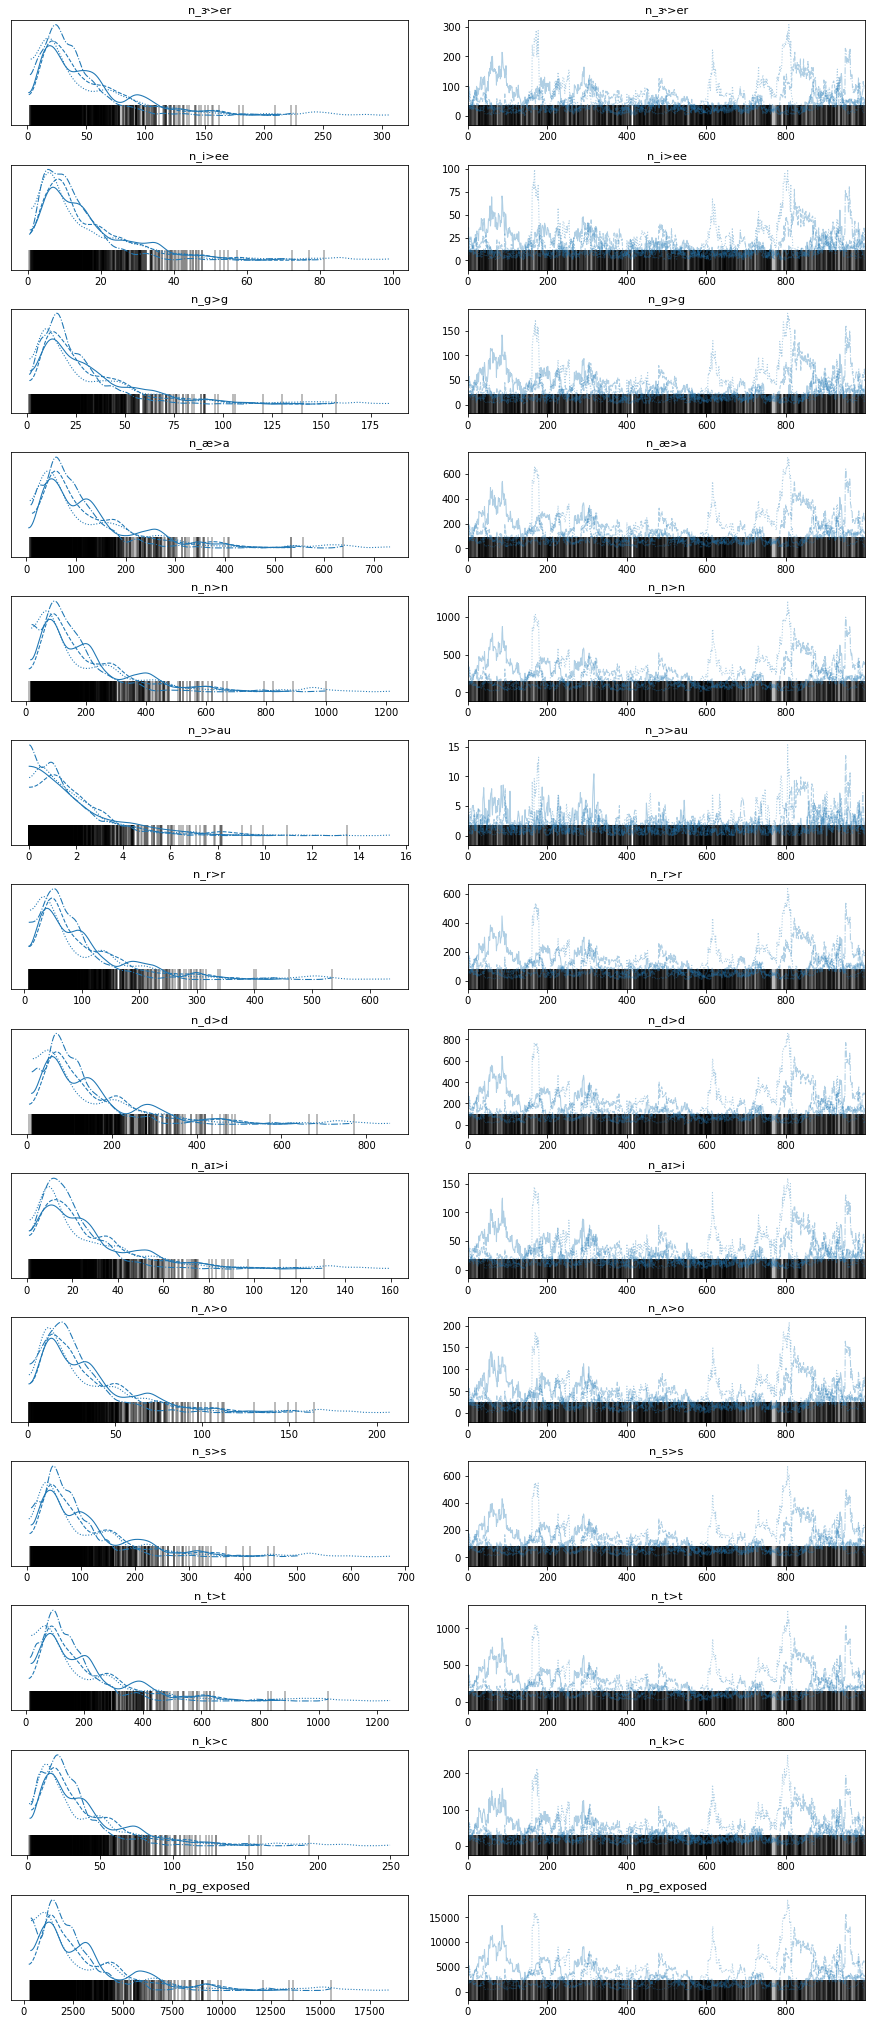

In [183]:
pm.traceplot(trace)

(array([1.599e+03, 6.980e+02, 3.040e+02, 2.050e+02, 1.890e+02, 1.880e+02,
        1.380e+02, 7.800e+01, 9.300e+01, 7.300e+01, 6.500e+01, 8.800e+01,
        7.000e+01, 6.000e+01, 4.800e+01, 2.000e+01, 2.000e+01, 5.000e+00,
        5.000e+00, 1.000e+01, 5.000e+00, 9.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00]),
 array([6.26181108e+00, 1.68677565e+02, 3.31093318e+02, 4.93509072e+02,
        6.55924825e+02, 8.18340579e+02, 9.80756332e+02, 1.14317209e+03,
        1.30558784e+03, 1.46800359e+03, 1.63041935e+03, 1.79283510e+03,
        1.95525085e+03, 2.11766661e+03, 2.28008236e+03, 2.44249811e+03,
        2.60491387e+03, 2.76732962e+03, 2.92974537e+03, 3.09216113e+03,
        3.254576

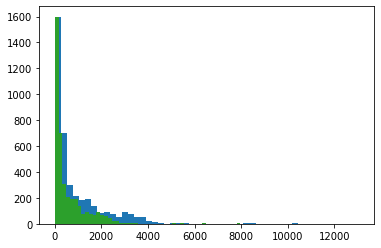

In [157]:
plt.hist(trace["n_t>t"], bins = 50)
plt.hist(trace["n_ɝ>er"], bins = 50)
plt.hist(trace["n_æ>a"], bins = 50)

(array([417., 348., 253., 184., 129., 120.,  81.,  61.,  53.,  39.,  31.,
         33.,  34.,  26.,  18.,  11.,  10.,   7.,  16.,  13.,   7.,  14.,
         12.,   7.,   7.,   4.,   8.,   2.,   1.,  10.,   4.,   4.,   2.,
          3.,   0.,   1.,   5.,   5.,   4.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   3.,   6.,   4.]),
 array([   2.09709545,   30.1001105 ,   58.10312555,   86.1061406 ,
         114.10915565,  142.11217071,  170.11518576,  198.11820081,
         226.12121586,  254.12423091,  282.12724596,  310.13026101,
         338.13327607,  366.13629112,  394.13930617,  422.14232122,
         450.14533627,  478.14835132,  506.15136637,  534.15438142,
         562.15739648,  590.16041153,  618.16342658,  646.16644163,
         674.16945668,  702.17247173,  730.17548678,  758.17850184,
         786.18151689,  814.18453194,  842.18754699,  870.19056204,
         898.19357709,  926.19659214,  954.1996072 ,  982.20262225,
        1010.2056373 , 1038.20865235, 1066.211

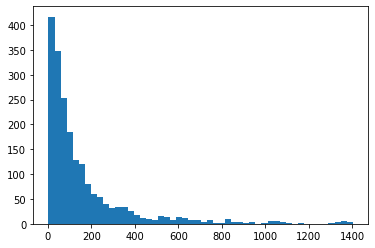

In [146]:
plt.hist(trace["n_ɝ>er"], bins = 50)

(array([420., 349., 256., 192., 118., 122.,  79.,  42.,  66.,  39.,  36.,
         30.,  37.,  24.,  13.,  16.,   8.,  11.,  13.,  12.,  17.,   8.,
         11.,   6.,   5.,   8.,   3.,   4.,   6.,   6.,   2.,   4.,   3.,
          2.,   1.,   1.,   5.,   2.,   5.,   2.,   1.,   0.,   1.,   0.,
          1.,   0.,   4.,   1.,   3.,   5.]),
 array([   6.72611717,   76.60340917,  146.48070117,  216.35799317,
         286.23528517,  356.11257717,  425.98986917,  495.86716117,
         565.74445317,  635.62174517,  705.49903718,  775.37632918,
         845.25362118,  915.13091318,  985.00820518, 1054.88549718,
        1124.76278918, 1194.64008118, 1264.51737318, 1334.39466518,
        1404.27195718, 1474.14924919, 1544.02654119, 1613.90383319,
        1683.78112519, 1753.65841719, 1823.53570919, 1893.41300119,
        1963.29029319, 2033.16758519, 2103.04487719, 2172.92216919,
        2242.7994612 , 2312.6767532 , 2382.5540452 , 2452.4313372 ,
        2522.3086292 , 2592.1859212 , 2662.063

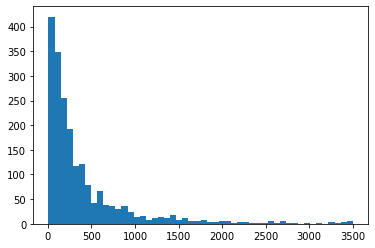

In [147]:
plt.hist(trace["n_æ>a"], bins = 50)

(array([  5.,  15.,  29.,  26.,  48.,  64.,  42.,  67.,  84., 101., 115.,
        108.,  96.,  83.,  89.,  95., 129.,  98., 101., 100., 149., 138.,
        174., 107., 122., 142.,  94.,  77., 116.,  98.,  95., 106., 122.,
        141., 126.,  76., 102.,  96.,  99., 130.,  97.,  38.,   8.,  23.,
          0.,   2.,   9.,   4.,   6.,   8.]),
 array([ 5.59825125,  5.73021656,  5.86218186,  5.99414717,  6.12611248,
         6.25807779,  6.3900431 ,  6.52200841,  6.65397371,  6.78593902,
         6.91790433,  7.04986964,  7.18183495,  7.31380026,  7.44576556,
         7.57773087,  7.70969618,  7.84166149,  7.9736268 ,  8.10559211,
         8.23755741,  8.36952272,  8.50148803,  8.63345334,  8.76541865,
         8.89738396,  9.02934926,  9.16131457,  9.29327988,  9.42524519,
         9.5572105 ,  9.68917581,  9.82114111,  9.95310642, 10.08507173,
        10.21703704, 10.34900235, 10.48096766, 10.61293297, 10.74489827,
        10.87686358, 11.00882889, 11.1407942 , 11.27275951, 11.40472482,
 

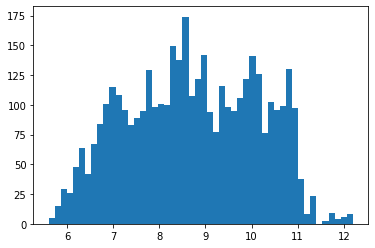

In [160]:
plt.hist(trace["log_n_pg_exposed"], bins = 50)

In [141]:
np.std(trace["log_n_pg_exposed"])

0.7595534049654671

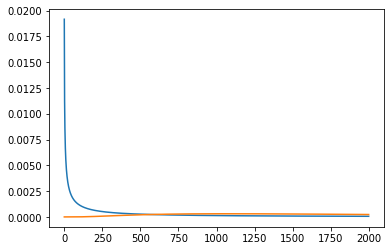

In [124]:
plt.plot(lognorm_probs(np.log(500), 3, 2000))
plt.plot(lognorm_probs(np.mean(trace["log_n_pg_exposed"]), np.std(trace["log_n_pg_exposed"]), 2000))

In [60]:
np.exp(np.mean(trace["log_n_pg_exposed"]))

6808.272816073456

In [194]:
pm.rhat(trace)

/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<xarray.Dataset>
Dimensions:       ()
Data variables:
    n_ɝ>er        float64 1.065
    n_i>ee        float64 1.047
    n_g>g         float64 1.065
    n_æ>a         float64 1.07
    n_n>n         float64 1.068
    n_ɔ>au        float64 1.027
    n_r>r         float64 1.069
    n_d>d         float64 1.069
    n_aɪ>i        float64 1.061
    n_ʌ>o         float64 1.06
    n_s>s         float64 1.065
    n_t>t         float64 1.07
    n_k>c         float64 1.066
    n_pg_exposed  float64 1.072

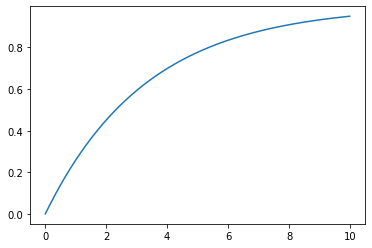

In [54]:
rng = np.arange(0, 10, 0.01)
plt.plot(rng, 1 - np.exp(-0.3 * rng))

In [187]:
with model:
    mean_field = pm.fit(method='advi')

Finished [100%]: Average Loss = 56.211


/usr/local/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


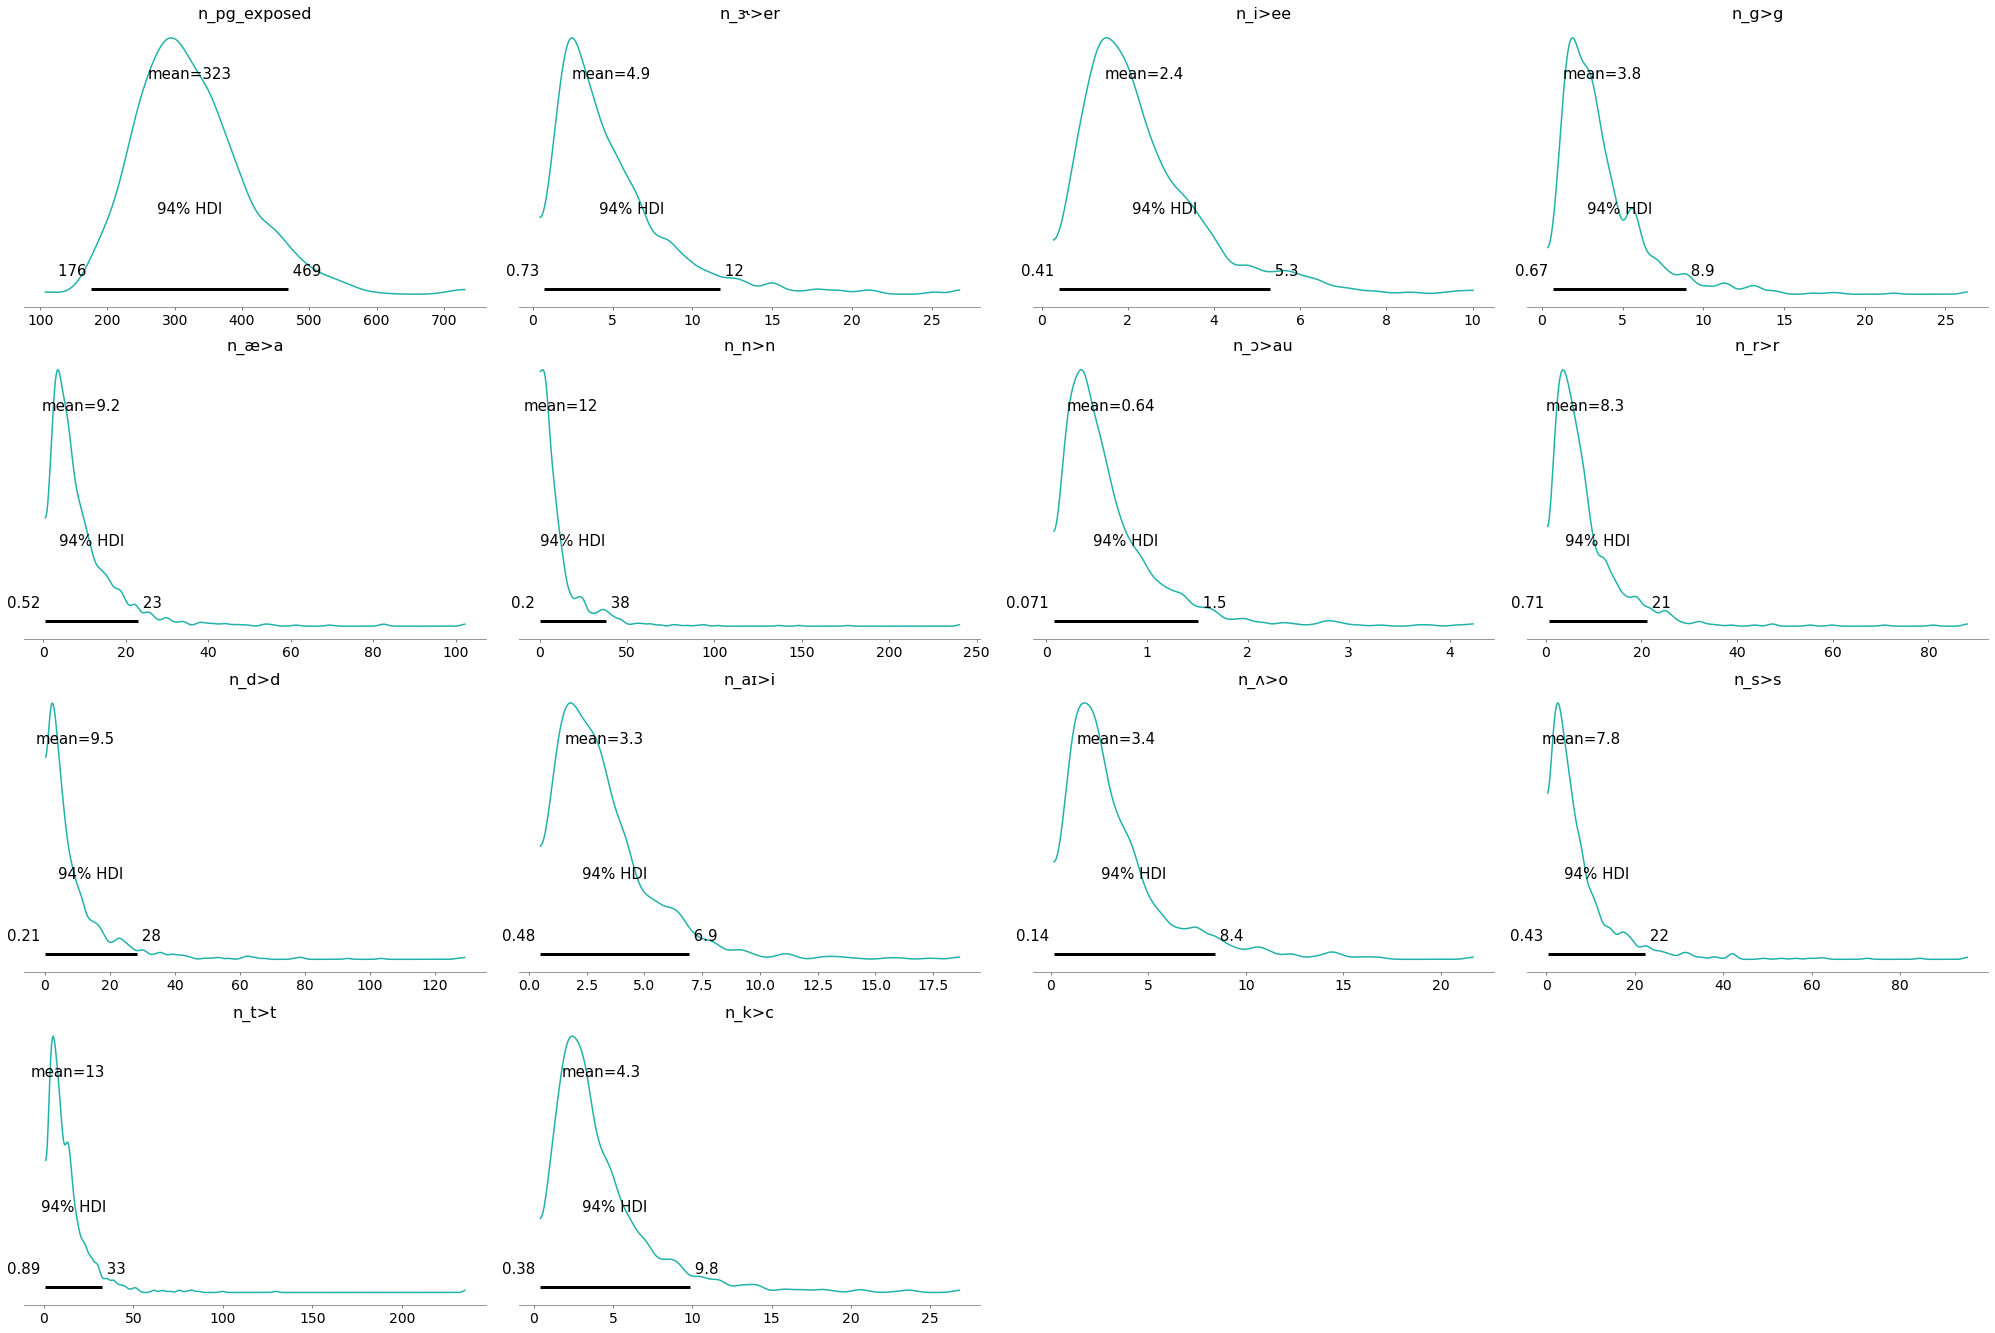

In [188]:
pm.plot_posterior(mean_field.sample(1000), color='LightSeaGreen');

In [189]:
ps[pg_idx['k>c']]

0.012271696775794353

In [191]:
ps[pg_idx['t>t']]

0.06485654203053876